In [1]:
import pandas as pd 
import numpy as np 
import scipy.io
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

# Question 1

In [2]:
mat_dataA = scipy.io.loadmat(r'C:\Users\tonkh\OneDrive\Desktop\ECE 657A\Assignment\Assignment2\Assignment2\Datasets\DataA.mat')
#dataB = pd.read_csv(r'C:\Users\tonkh\OneDrive\Desktop\ECE 657A\Assignment\Assignment2\Assignment2\Datasets\DataA.mat')

In [3]:
mat_dataA

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Oct 21 15:46:48 2014',
 '__version__': '1.0',
 '__globals__': [],
 'fea': array([[1, 2, 1, ..., 2, 2, 1],
        [3, 3, 4, ..., 1, 3, 4],
        [4, 1, 4, ..., 2, 4, 4],
        ...,
        [3, 4, 4, ..., 3, 1, 2],
        [1, 4, 3, ..., 4, 3, 4],
        [4, 3, 1, ..., 2, 4, 3]], dtype=uint8),
 'gnd': array([[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]], dtype=int16)}

In [4]:
df_dataA=pd.DataFrame.from_dict(mat_dataA,orient='index')

In [5]:
df_dataA

,0
__header__,"b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Crea..."
__version__,1.0
__globals__,[]
fea,"[[1, 2, 1, 2, 1, 2, 3, 3, 3, 3, 1, 2, 1, 3, 4,..."
gnd,"[[1], [1], [1], [-1], [-1], [-1], [1], [1], [1..."


In [6]:
mat_dataA

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Oct 21 15:46:48 2014',
 '__version__': '1.0',
 '__globals__': [],
 'fea': array([[1, 2, 1, ..., 2, 2, 1],
        [3, 3, 4, ..., 1, 3, 4],
        [4, 1, 4, ..., 2, 4, 4],
        ...,
        [3, 4, 4, ..., 3, 1, 2],
        [1, 4, 3, ..., 4, 3, 4],
        [4, 3, 1, ..., 2, 4, 3]], dtype=uint8),
 'gnd': array([[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]], dtype=int16)}

In [7]:
mat_features_datA=mat_dataA['fea']

In [8]:
mat_label_dataA=mat_dataA['gnd']

In [9]:
df_features_dataA=pd.DataFrame(mat_features_datA)
df_features_dataA

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,1,2,1,2,1,2,3,3,3,3,...,4,3,2,3,4,2,2,2,2,1
1,3,3,4,2,1,2,2,4,3,2,...,3,1,4,3,4,4,4,1,3,4
2,4,1,4,4,4,4,1,1,2,1,...,1,1,2,1,1,4,2,2,4,4
3,1,4,1,1,3,3,4,4,3,4,...,2,1,3,3,4,1,3,3,4,2
4,3,4,4,3,1,1,4,4,4,1,...,4,3,1,3,2,1,4,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,3,3,3,4,2,2,3,3,4,4,...,2,1,4,3,3,4,1,2,1,3
2196,3,3,1,1,2,3,3,4,3,1,...,4,2,1,3,1,2,3,4,2,3
2197,3,4,4,3,3,3,1,2,4,3,...,2,4,3,3,4,1,2,3,1,2
2198,1,4,3,4,1,3,4,2,4,3,...,4,2,4,2,2,2,4,4,3,4


In [10]:
print(df_features_dataA.describe())

                0            1            2            3            4   \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean      2.493182     2.529545     2.506818     2.526818     2.547727   
std       1.103943     1.086542     1.098160     1.118780     1.081699   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       2.000000     2.000000     2.000000     2.000000     2.000000   
50%       3.000000     3.000000     3.000000     3.000000     3.000000   
75%       3.000000     3.000000     3.000000     4.000000     3.000000   
max       4.000000     4.000000     4.000000     4.000000     4.000000   

                5            6            7            8           9   ...  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.00000  ...   
mean      2.492727     2.550000     2.541364     2.553182     2.56500  ...   
std       1.099399     1.109818     1.103600     1.126751     1.10822  ...   
min       1.000000   

In [11]:
#Check missing values
df_features_dataA.isna().sum().sum()


0

### There are no missing values in the dataset

In [12]:
df_label_dataA=pd.DataFrame(mat_label_dataA)
df_label_dataA[0].unique()

array([ 1, -1], dtype=int16)

### There are two unique labels in the data set -1 and 1

In [13]:
#checking missing labels
df_label_dataA[0].isna().sum().sum()

0

### There are no missing labels in the data set

### Part 1 - Z-Score Normalization

In [14]:
 # Z-Score Normalization
ss = StandardScaler()
ss.fit(df_features_dataA)
z_standardized_dataA = ss.transform(df_features_dataA)

In [15]:
print(z_standardized_dataA)

[[-1.35289759 -0.48747864 -1.37244139 ... -0.4584159  -0.41756618
  -1.39224875]
 [ 0.45920268  0.43308188  1.36002111 ... -1.37441497  0.49741947
   1.36965138]
 [ 1.36525282 -1.40803915  1.36002111 ... -0.4584159   1.41240513
   1.36965138]
 ...
 [ 0.45920268  1.35364239  1.36002111 ...  0.45758317 -1.33255183
  -0.47161537]
 [-1.35289759  1.35364239  0.44920027 ...  1.37358225  0.49741947
   1.36965138]
 [ 1.36525282  0.43308188 -1.37244139 ... -0.4584159   1.41240513
   0.44901801]]


In [16]:
#convert labels to numpy array
np_label_dataA=df_label_dataA.to_numpy()
print("converted array is :",np_label_dataA)

converted array is : [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


### Randomnly spliting the data 70% of samples for taining and other 30% for testing
### using hold-out scheme

In [17]:
x_train_dataA, x_test_dataA, y_train_dataA, y_test_dataA = train_test_split(z_standardized_dataA,np_label_dataA.ravel(),test_size =
0.3, random_state = 40)
#model.fit(x_train_dataA, y_train_dataA)
#y_predict_dataA = model.predict(x_test_dataA)
print(x_train_dataA)
print(y_train_dataA)

[[-0.44684745  1.35364239 -0.46162056 ... -0.4584159  -0.41756618
   0.44901801]
 [ 0.45920268 -1.40803915  1.36002111 ...  0.45758317  0.49741947
   1.36965138]
 [-1.35289759  1.35364239 -1.37244139 ...  0.45758317  1.41240513
  -0.47161537]
 ...
 [ 1.36525282 -0.48747864 -0.46162056 ... -0.4584159   0.49741947
   0.44901801]
 [ 0.45920268  1.35364239  0.44920027 ...  1.37358225  1.41240513
  -0.47161537]
 [ 0.45920268  0.43308188  0.44920027 ...  0.45758317 -1.33255183
  -0.47161537]]
[ 1 -1 -1 ...  1 -1  1]


### The holdout method is the simplest kind of cross validation. The data set is separated into two sets, called the training set and the testing set. The function approximator fits a function using the training set only. Then the function approximator is asked to predict the output values for the data in the testing set (it has never seen these output values before). The errors it makes are accumulated as before to give the mean absolute test set error, which is used to evaluate the model. The advantage of this method is that it is usually preferable to the residual method and takes no longer to compute. However, its evaluation can have a high variance. The evaluation may depend heavily on which data points end up in the training set and which end up in the test set, and thus the evaluation may be significantly different depending on how the division is made. --> need to reword it

### 2. 5-fold cross validation on training set to select the parameters k for k_NN from given set and plot

In [18]:
k_list=list(range(1,32,2))
print("Set of parameters for k value is:",k_list)

Set of parameters for k value is: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]


In [19]:
# empty list to store accuracy
K_accuracy=[]

# looping through given values of k
for k in k_list:
    # 2. KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. cross_val_score for KNeighborsClassifier with k neighbours
    accuracy = cross_val_score(knn, x_train_dataA, y_train_dataA, cv=5, scoring='accuracy')
    print("For k= {}, Accuracies: {}".format(k, accuracy))
    #4. append mean of scores for k neighbours to k_accuracy list
    K_accuracy.append(accuracy.mean())

print("Mean of accuracy scores:",K_accuracy)


For k= 1, Accuracies: [0.69805195 0.74350649 0.70454545 0.71753247 0.69805195]
For k= 3, Accuracies: [0.73376623 0.73701299 0.72077922 0.74025974 0.71753247]
For k= 5, Accuracies: [0.71428571 0.73701299 0.74025974 0.72727273 0.72077922]
For k= 7, Accuracies: [0.73051948 0.74350649 0.71753247 0.75324675 0.70454545]
For k= 9, Accuracies: [0.71428571 0.73376623 0.71753247 0.73376623 0.71103896]
For k= 11, Accuracies: [0.72077922 0.74350649 0.71753247 0.74025974 0.71428571]
For k= 13, Accuracies: [0.70779221 0.72402597 0.72402597 0.75324675 0.68181818]
For k= 15, Accuracies: [0.72077922 0.73701299 0.70454545 0.75324675 0.68506494]
For k= 17, Accuracies: [0.71428571 0.72727273 0.71753247 0.74675325 0.68831169]
For k= 19, Accuracies: [0.72402597 0.73051948 0.73051948 0.73376623 0.68506494]
For k= 21, Accuracies: [0.70779221 0.72727273 0.71753247 0.72077922 0.68506494]
For k= 23, Accuracies: [0.71103896 0.71103896 0.71753247 0.72727273 0.68181818]
For k= 25, Accuracies: [0.71753247 0.71428571

Text(0, 0.5, 'Cross-validated accuracy')

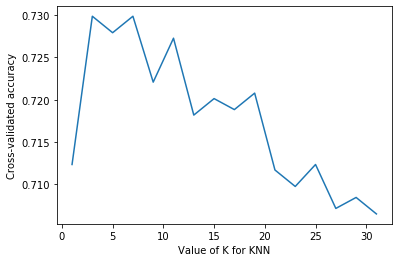

In [20]:
plt.plot(k_list, K_accuracy)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [21]:
print('The best Calculation accuracy is :' , max(K_accuracy))


The best Calculation accuracy is : 0.72987012987013


### The Best Calculation accuracy of 0.72987012987013 ie. 72.987012987013 % is best for value of K=3

### 3. RBF Kernel best parameter selection in terms of classification accuracy

In [22]:
# Dictionary od possible parameters
c=[0.1, 0.5, 1, 2, 5, 10, 20, 50]
gamma=[0.01, 0.05 , 0.1, 0.5, 1, 2, 5, 10]
param_dict=dict(C=c,gamma=gamma)
print(param_dict)

{'C': [0.1, 0.5, 1, 2, 5, 10, 20, 50], 'gamma': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]}


In [23]:
#Grid Search CV Object
grid_rbf=GridSearchCV(SVC(), param_dict,cv=None)

#z_standardized_dataA
# c= None takes default 5-fold crossvalidation as given in documentation
#print(grid_rbf)

In [24]:
# Data fitted with best parameters 
clf=svm.SVC()
#clf.fit(x_train_dataA, y_train_dataA)
#grid_rbf.fit(x_train_dataA, y_train_dataA)
#grid_rbf.fit(z_standardized_dataA,np_label_dataA.ravel())
#grid_rbf.get_params().keys()
#print("The best classifier is: ", clf.cv_results_)


search = GridSearchCV(clf, param_dict, cv=5,scoring = 'accuracy').fit(x_train_dataA, y_train_dataA)

In [25]:
search.best_score_
    

0.9064935064935066

In [26]:
search.best_params_
           

{'C': 5, 'gamma': 0.01}

### The best parameters are : The best Soft Margin penality 'c' is 5 and gamma is 0.01

### 4. 

In [27]:
# classify the test set
#checking the test set
print(x_test_dataA)
print(y_test_dataA)

[[-1.35289759  0.43308188 -1.37244139 ...  1.37358225 -0.41756618
   0.44901801]
 [-1.35289759 -0.48747864  0.44920027 ...  1.37358225 -0.41756618
  -1.39224875]
 [ 1.36525282 -1.40803915 -1.37244139 ...  0.45758317  0.49741947
  -1.39224875]
 ...
 [-1.35289759  0.43308188  0.44920027 ... -1.37441497 -1.33255183
  -1.39224875]
 [ 1.36525282  1.35364239 -1.37244139 ... -1.37441497 -0.41756618
   1.36965138]
 [-1.35289759 -0.48747864 -1.37244139 ... -0.4584159  -0.41756618
  -1.39224875]]
[-1 -1 -1 -1  1  1  1  1 -1 -1  1  1  1  1  1 -1  1  1 -1  1 -1  1 -1 -1
  1  1  1  1  1 -1  1  1 -1 -1 -1  1 -1  1  1 -1  1  1  1  1 -1 -1 -1  1
  1 -1  1 -1 -1  1 -1  1  1  1  1  1 -1  1 -1 -1  1  1  1 -1 -1  1  1 -1
 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1 -1  1  1 -1
  1  1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1  1 -1 -1  1 -1 -1  1 -1  1 -1 -1
  1 -1 -1  1  1  1 -1  1  1 -1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1
  1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1 -1 -1 

In [28]:
# For K-NN using above parameters to classify the test set 
# k=3 gave best classification accuracy
Knn_model=KNeighborsClassifier(n_neighbors=3)
Knn_model.fit(x_train_dataA,y_train_dataA)

y_pred_KNN=Knn_model.predict(x_test_dataA)

# comparison between actual and predicted response
print("Accuracy is :",metrics.accuracy_score(y_test_dataA, y_pred_KNN))
print("Precision is :",metrics.precision_score(y_test_dataA, y_pred_KNN))
print("Recall is :",metrics.recall_score(y_test_dataA, y_pred_KNN))
print("F1-Score is :",metrics.f1_score(y_test_dataA, y_pred_KNN))

Accuracy is : 0.7363636363636363
Precision is : 0.8963963963963963
Recall is : 0.5685714285714286
F1-Score is : 0.695804195804196


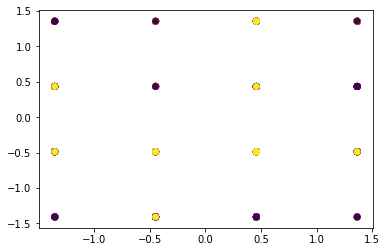

In [29]:
# Plot showing the classification with predicted values for 1st two features
plt.scatter(x_test_dataA[:,0],x_test_dataA[:,1],c=y_pred_KNN)

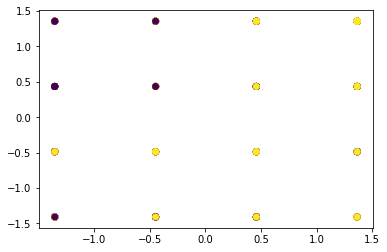

In [30]:
#Plot showing the classification with actual test y values for 1st two features
plt.scatter(x_test_dataA[:,0],x_test_dataA[:,1],c=y_test_dataA)

In [31]:
# For SVM using above parameters to classify the test set
SVN_model=SVC(C=5,gamma=0.01)
SVN_model.fit(x_train_dataA,y_train_dataA)

y_pred_SVN=SVN_model.predict(x_test_dataA)


# comparison between actual and predicted response
print("Accuracy is :",metrics.accuracy_score(y_test_dataA, y_pred_SVN))
print("Precision is :",metrics.precision_score(y_test_dataA, y_pred_SVN))
print("Recall is :",metrics.recall_score(y_test_dataA, y_pred_SVN))
print("F1-Score is :",metrics.f1_score(y_test_dataA, y_pred_SVN))

Accuracy is : 0.8878787878787879
Precision is : 0.9107142857142857
Recall is : 0.8742857142857143
F1-Score is : 0.892128279883382


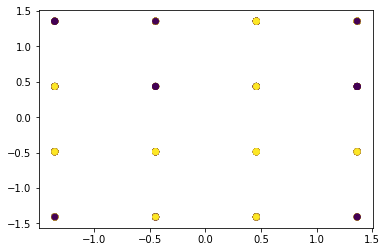

In [32]:
# Plot showing the classification with predicted valuesfor 1st two features
plt.scatter(x_test_dataA[:,0],x_test_dataA[:,1],c=y_pred_SVN)

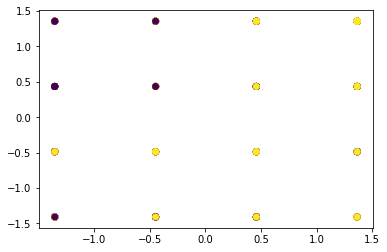

In [33]:
#Plot showing the classification with actual test y values for 1st two features
plt.scatter(x_test_dataA[:,0],x_test_dataA[:,1],c=y_test_dataA)

In [34]:
# Using default setups for Naive Bayes Classifier to classify test set

#using default Gaussian Naive Bayes

NB_model=GaussianNB()
NB_model.fit(x_train_dataA,y_train_dataA)

y_pred_NB=NB_model.predict(x_test_dataA)

# comparison between actual and predicted response
print("Accuracy is :",metrics.accuracy_score(y_test_dataA, y_pred_NB))
print("Precision is :",metrics.precision_score(y_test_dataA, y_pred_NB))
print("Recall is :",metrics.recall_score(y_test_dataA, y_pred_NB))
print("F1-Score is :",metrics.f1_score(y_test_dataA, y_pred_NB))

Accuracy is : 0.853030303030303
Precision is : 0.8666666666666667
Recall is : 0.8542857142857143
F1-Score is : 0.860431654676259


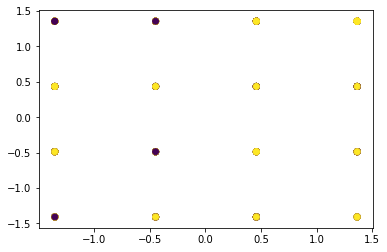

In [35]:
# Plot showing the classification with predicted valuesfor 1st two features
plt.scatter(x_test_dataA[:,0],x_test_dataA[:,1],c=y_pred_NB)

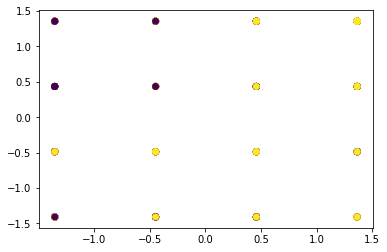

In [36]:
#Plot showing the classification with actual test y values for 1st two features
plt.scatter(x_test_dataA[:,0],x_test_dataA[:,1],c=y_test_dataA)

In [37]:
# Using default setups for Decision Trees to classify test set
DT_model = DecisionTreeClassifier()
DT_model.fit(x_train_dataA,y_train_dataA)

y_pred_DT=DT_model.predict(x_test_dataA)

# comparison between actual and predicted response
print("Accuracy is :",metrics.accuracy_score(y_test_dataA, y_pred_DT))
print("Precision is :",metrics.precision_score(y_test_dataA, y_pred_DT))
print("Recall is :",metrics.recall_score(y_test_dataA, y_pred_DT))
print("F1-Score is :",metrics.f1_score(y_test_dataA, y_pred_DT))

Accuracy is : 0.9287878787878788
Precision is : 0.9365994236311239
Recall is : 0.9285714285714286
F1-Score is : 0.9325681492109038


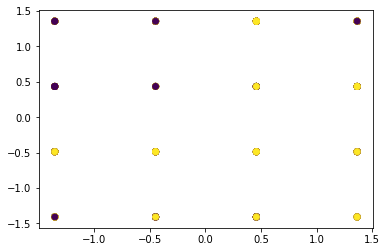

In [38]:
# Plot showing the classification with predicted values for 1st two features
plt.scatter(x_test_dataA[:,0],x_test_dataA[:,1],c=y_pred_DT)

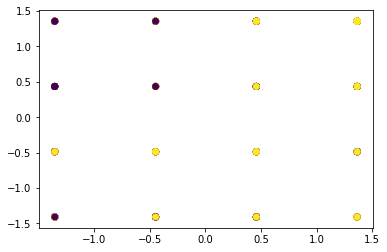

In [39]:
#Plot showing the classification with actual test y values for 1st two features
plt.scatter(x_test_dataA[:,0],x_test_dataA[:,1],c=y_test_dataA)

In [40]:
#Custom function to create float range

def frange(start,stop=None,step=None):
    
    if stop == None:
        stop=start+0.0
        start=0.0
        
    if step==None:
        step=1.0
        
    while True:
        if step>0 and start>=stop:
            break
        elif step<0 and start <=stop:
            break
        yield("%g" % start)
        start=start+step

iterations=frange(0.045,0.91,0.045)
test_iterations=[]
#Function tested here

for n in iterations:
    test_iterations.append(float(n))
    print("Test split values:",n)
    print("List of test iterations",test_iterations)
    f1=1-float(n)
    f2=f'{f1:.3f}'
    print("Train split values",f2)
    print("\n")

Test split values: 0.045
List of test iterations [0.045]
Train split values 0.955


Test split values: 0.09
List of test iterations [0.045, 0.09]
Train split values 0.910


Test split values: 0.135
List of test iterations [0.045, 0.09, 0.135]
Train split values 0.865


Test split values: 0.18
List of test iterations [0.045, 0.09, 0.135, 0.18]
Train split values 0.820


Test split values: 0.225
List of test iterations [0.045, 0.09, 0.135, 0.18, 0.225]
Train split values 0.775


Test split values: 0.27
List of test iterations [0.045, 0.09, 0.135, 0.18, 0.225, 0.27]
Train split values 0.730


Test split values: 0.315
List of test iterations [0.045, 0.09, 0.135, 0.18, 0.225, 0.27, 0.315]
Train split values 0.685


Test split values: 0.36
List of test iterations [0.045, 0.09, 0.135, 0.18, 0.225, 0.27, 0.315, 0.36]
Train split values 0.640


Test split values: 0.405
List of test iterations [0.045, 0.09, 0.135, 0.18, 0.225, 0.27, 0.315, 0.36, 0.405]
Train split values 0.595


Test split value

In [41]:
# Repeating above steps 20 times by varying the split of training-test set 
# as in Step 1

#for KNN
Knn_model2=KNeighborsClassifier(n_neighbors=3)
#Classification based on KNN
KNN_accuracy_list=[]
KNN_precision_list=[]
KNN_recall_list=[]
KNN_f1_list=[]
#Iteration for Retraining
for i in test_iterations:
    #f1=1-float(i)
    #f2=f'{f1:.3f}'
    #Random Dataset Split
    x_train_dataA_KNN, x_test_dataA_KNN, y_train_dataA_KNN, y_test_dataA_KNN = train_test_split(z_standardized_dataA,np_label_dataA.ravel(),test_size =i, random_state = 40)
    #Training the Model
    Knn_model2.fit(x_train_dataA_KNN, y_train_dataA_KNN)
    #Test Dataset Prediction
    y_predict_KNN_list = Knn_model2.predict(x_test_dataA_KNN)
    #Classification Accuracy
    accuracy=metrics.accuracy_score(y_test_dataA_KNN, y_predict_KNN_list)
    KNN_accuracy_list.append(accuracy)
    
    #Precision
    precision=metrics.precision_score(y_test_dataA_KNN, y_predict_KNN_list)
    KNN_precision_list.append(precision)
                                    
    #Recall
    recall=metrics.recall_score(y_test_dataA_KNN, y_predict_KNN_list)
    KNN_recall_list.append(recall)
    
    #F1-score
    f1score=metrics.f1_score(y_test_dataA_KNN, y_predict_KNN_list)
    KNN_f1_list.append(f1score)

print("Acuracy list is :",KNN_accuracy_list)
print("\n")
print("Precision list is :",KNN_precision_list)
print("\n")
print("Recall list is:",KNN_recall_list)
print("\n")
print("F1-Score list is:",KNN_f1_list)
print("\n")

#Average and standard Deviation of Classification values

mean_accuracy_list_KNN=sum(KNN_accuracy_list)/len(KNN_accuracy_list)
variance_accuracy_list_KNN=sum([((x-mean_accuracy_list_KNN)**2) for x in KNN_accuracy_list])/len(KNN_accuracy_list)
sd_accuracy_list_KNN=variance_accuracy_list_KNN**0.5

print("mean for accuracy in case of KNN is",mean_accuracy_list_KNN)
print("\n")
print("Standard Deviation for accuracy in case of KNN is",sd_accuracy_list_KNN)

Acuracy list is : [0.7171717171717171, 0.7525252525252525, 0.7373737373737373, 0.7297979797979798, 0.7353535353535353, 0.7441077441077442, 0.733044733044733, 0.7462121212121212, 0.734304932735426, 0.7282828282828283, 0.721763085399449, 0.7306397306397306, 0.7233877233877234, 0.7164502164502164, 0.7117845117845117, 0.711489898989899, 0.7082590612002376, 0.704991587212563, 0.7076023391812866, 0.6732323232323232]


Precision list is : [0.9117647058823529, 0.9152542372881356, 0.8888888888888888, 0.8833333333333333, 0.8875, 0.9030612244897959, 0.8977777777777778, 0.9029850746268657, 0.8979591836734694, 0.9047619047619048, 0.8908045977011494, 0.8642857142857143, 0.851528384279476, 0.84, 0.8185117967332124, 0.8278260869565217, 0.8105939004815409, 0.7873563218390804, 0.7719298245614035, 0.7639077340569878]


Recall list is: [0.5535714285714286, 0.5510204081632653, 0.5405405405405406, 0.5326633165829145, 0.5568627450980392, 0.5709677419354838, 0.554945054945055, 0.580335731414868, 0.56050955414

In [42]:
#for SVM
SVM_model2=SVC(C=5,gamma=0.01)

#Classification based on SVM
SVM_accuracy_list=[]
SVM_precision_list=[]
SVM_recall_list=[]
SVM_f1_list=[]
#Iteration for Retraining
for i in test_iterations:
    #f1=1-float(i)
    #f2=f'{f1:.3f}'
    #Random Dataset Split
    x_train_dataA_SVM, x_test_dataA_SVM, y_train_dataA_SVM, y_test_dataA_SVM = train_test_split(z_standardized_dataA,np_label_dataA.ravel(),test_size =i, random_state = 40)
    #Training the Model
    SVM_model2.fit(x_train_dataA_SVM, y_train_dataA_SVM)
    #Test Dataset Prediction
    y_predict_SVM_list = SVM_model2.predict(x_test_dataA_SVM)
    #Classification Accuracy
    accuracy=metrics.accuracy_score(y_test_dataA_SVM, y_predict_SVM_list)
    SVM_accuracy_list.append(accuracy)
    
    #Precision
    precision=metrics.precision_score(y_test_dataA_SVM, y_predict_SVM_list)
    SVM_precision_list.append(precision)
                                    
    #Recall
    recall=metrics.recall_score(y_test_dataA_SVM, y_predict_SVM_list)
    SVM_recall_list.append(recall)
    
    #F1-score
    f1score=metrics.f1_score(y_test_dataA_SVM, y_predict_SVM_list)
    SVM_f1_list.append(f1score)

print("Acuracy list is :",SVM_accuracy_list)
print("\n")
print("Precision list is :",SVM_precision_list)
print("\n")
print("Recall list is:",SVM_recall_list)
print("\n")
print("F1-Score list is:",SVM_f1_list)
print("\n")

#Average and standard Deviation of Classification values

mean_accuracy_list_SVM=sum(SVM_accuracy_list)/len(SVM_accuracy_list)
variance_accuracy_list_SVM=sum([((x-mean_accuracy_list_SVM)**2) for x in SVM_accuracy_list])/len(SVM_accuracy_list)
sd_accuracy_list_SVM=variance_accuracy_list_SVM**0.5

print("mean for accuracy in case of SVM is",mean_accuracy_list_SVM)
print("\n")
print("Standard Deviation for accuracy in case of SVM is",sd_accuracy_list_SVM)

Acuracy list is : [0.8787878787878788, 0.8838383838383839, 0.8956228956228957, 0.9015151515151515, 0.8949494949494949, 0.8939393939393939, 0.8917748917748918, 0.9040404040404041, 0.8968609865470852, 0.896969696969697, 0.8943985307621671, 0.8838383838383839, 0.8904428904428905, 0.8737373737373737, 0.8693602693602693, 0.8693181818181818, 0.8686868686868687, 0.8614694335389792, 0.8617756512493354, 0.8151515151515152]


Precision list is : [0.9230769230769231, 0.9032258064516129, 0.903448275862069, 0.9040404040404041, 0.9011857707509882, 0.9075907590759076, 0.9188405797101449, 0.9338422391857506, 0.9258426966292135, 0.9288617886178862, 0.9197080291970803, 0.9066666666666666, 0.9099236641221374, 0.8864265927977839, 0.8754813863928113, 0.881851400730816, 0.8815331010452961, 0.8702290076335878, 0.8731958762886598, 0.8356713426853707]


Recall list is: [0.8571428571428571, 0.8571428571428571, 0.8851351351351351, 0.8994974874371859, 0.8941176470588236, 0.8870967741935484, 0.8708791208791209, 0.

In [43]:
# For Naive Bayes
#for NB
NB_model2=GaussianNB()

#Classification based on NB
NB_accuracy_list=[]
NB_precision_list=[]
NB_recall_list=[]
NB_f1_list=[]
#Iteration for Retraining
for i in test_iterations:
    #f1=1-float(i)
    #f2=f'{f1:.3f}'
    #Random Dataset Split
    x_train_dataA_NB, x_test_dataA_NB, y_train_dataA_NB, y_test_dataA_NB = train_test_split(z_standardized_dataA,np_label_dataA.ravel(),test_size =i, random_state = 40)
    #Training the Model
    NB_model2.fit(x_train_dataA_NB, y_train_dataA_NB)
    #Test Dataset Prediction
    y_predict_NB_list = NB_model2.predict(x_test_dataA_NB)
    #Classification Accuracy
    accuracy=metrics.accuracy_score(y_test_dataA_NB, y_predict_NB_list)
    NB_accuracy_list.append(accuracy)
    
    #Precision
    precision=metrics.precision_score(y_test_dataA_NB, y_predict_NB_list)
    NB_precision_list.append(precision)
                                    
    #Recall
    recall=metrics.recall_score(y_test_dataA_NB, y_predict_NB_list)
    NB_recall_list.append(recall)
    
    #F1-score
    f1score=metrics.f1_score(y_test_dataA_NB, y_predict_NB_list)
    NB_f1_list.append(f1score)

print("Acuracy list is :",NB_accuracy_list)
print("\n")
print("Precision list is :",NB_precision_list)
print("\n")
print("Recall list is:",NB_recall_list)
print("\n")
print("F1-Score list is:",NB_f1_list)
print("\n")

#Average and standard Deviation of Classification values

mean_accuracy_list_NB=sum(NB_accuracy_list)/len(NB_accuracy_list)
variance_accuracy_list_NB=sum([((x-mean_accuracy_list_NB)**2) for x in NB_accuracy_list])/len(NB_accuracy_list)
sd_accuracy_list_NB=variance_accuracy_list_NB**0.5

print("mean for accuracy in case of NB is",mean_accuracy_list_NB)
print("\n")
print("Standard Deviation for accuracy in case of NB is",sd_accuracy_list_NB)


Acuracy list is : [0.8383838383838383, 0.8232323232323232, 0.8451178451178452, 0.8560606060606061, 0.8525252525252526, 0.8535353535353535, 0.8542568542568543, 0.8598484848484849, 0.8621076233183856, 0.8616161616161616, 0.8631772268135904, 0.8661616161616161, 0.8671328671328671, 0.8694083694083694, 0.8686868686868687, 0.860479797979798, 0.8597742127153892, 0.8491306786315199, 0.8633705475810739, 0.8636363636363636]


Precision list is : [0.9, 0.8247422680412371, 0.8541666666666666, 0.8622448979591837, 0.8669354838709677, 0.8704318936877077, 0.8662952646239555, 0.8695652173913043, 0.8702127659574468, 0.8671726755218216, 0.8672413793103448, 0.8677165354330708, 0.8668596237337193, 0.8612565445026178, 0.8509615384615384, 0.8471121177802945, 0.8504366812227074, 0.8308157099697885, 0.8452041785375118, 0.850091407678245]


Recall list is: [0.8035714285714286, 0.8163265306122449, 0.831081081081081, 0.8492462311557789, 0.8431372549019608, 0.8451612903225807, 0.8543956043956044, 0.863309352517985

In [44]:
#for DT
DT_model2 = DecisionTreeClassifier()

#Classification based on DT
DT_accuracy_list=[]
DT_precision_list=[]
DT_recall_list=[]
DT_f1_list=[]
#Iteration for Retraining
for i in test_iterations:
    #f1=1-float(i)
    #f2=f'{f1:.3f}'
    #Random Dataset Split
    x_train_dataA_DT, x_test_dataA_DT, y_train_dataA_DT, y_test_dataA_DT = train_test_split(z_standardized_dataA,np_label_dataA.ravel(),test_size =i, random_state = 40)
    #Training the Model
    DT_model2.fit(x_train_dataA_DT, y_train_dataA_DT)
    #Test Dataset Prediction
    y_predict_DT_list = DT_model2.predict(x_test_dataA_DT)
    #Classification Accuracy
    accuracy=metrics.accuracy_score(y_test_dataA_DT, y_predict_DT_list)
    DT_accuracy_list.append(accuracy)
    
    #Precision
    precision=metrics.precision_score(y_test_dataA_DT, y_predict_DT_list)
    DT_precision_list.append(precision)
                                    
    #Recall
    recall=metrics.recall_score(y_test_dataA_DT, y_predict_DT_list)
    DT_recall_list.append(recall)
    
    #F1-score
    f1score=metrics.f1_score(y_test_dataA_DT, y_predict_DT_list)
    DT_f1_list.append(f1score)

print("Acuracy list is :",DT_accuracy_list)
print("\n")
print("Precision list is :",DT_precision_list)
print("\n")
print("Recall is list :",DT_recall_list)
print("\n")
print("F1-Score is list :",DT_f1_list)
print("\n")

#Average and standard Deviation of Classification values

mean_accuracy_list_DT=sum(DT_accuracy_list)/len(DT_accuracy_list)
variance_accuracy_list_DT=sum([((x-mean_accuracy_list_DT)**2) for x in DT_accuracy_list])/len(DT_accuracy_list)
sd_accuracy_list_DT=variance_accuracy_list_DT**0.5

print("mean for accuracy in case of DT is",mean_accuracy_list_DT)
print("\n")
print("Standard Deviation for accuracy in case of DT is",sd_accuracy_list_DT)

Acuracy list is : [0.9191919191919192, 0.9191919191919192, 0.936026936026936, 0.9343434343434344, 0.9232323232323232, 0.936026936026936, 0.9235209235209235, 0.9305555555555556, 0.9192825112107623, 0.9030303030303031, 0.9247015610651974, 0.9065656565656566, 0.9137529137529138, 0.911976911976912, 0.9023569023569024, 0.9166666666666666, 0.8983957219251337, 0.8984856982613573, 0.9064327485380117, 0.9222222222222223]


Precision list is : [0.9137931034482759, 0.9183673469387755, 0.9328859060402684, 0.9435897435897436, 0.9288537549407114, 0.9387096774193548, 0.9307479224376731, 0.948019801980198, 0.934640522875817, 0.9022556390977443, 0.9362831858407079, 0.9093799682034976, 0.9276018099547512, 0.9321074964639321, 0.9085051546391752, 0.9420654911838791, 0.9348093480934809, 0.9276693455797933, 0.904, 0.9584199584199584]


Recall is list : [0.9464285714285714, 0.9183673469387755, 0.9391891891891891, 0.9246231155778895, 0.9215686274509803, 0.9387096774193548, 0.9230769230769231, 0.91846522781774

# 5. Comment on obtained results